In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

In [42]:
# Load the data from the CSV file
data = pd.read_csv(r'D:\Kaggle\data\train.csv')

# Sort the data based on the DataFrame index
data = data.sort_index()

# Determine the split index
split_index = int(len(data) * 0.78)

# Create train and test sets based on the split index
trainDF = data.iloc[:split_index]
testDF = data.iloc[split_index:]

# Drop the 'user' column from the test set if it exists
if 'user' in testDF.columns:
    testDF = testDF.drop(columns=['user'])

# Verify the shapes of the resulting DataFrames
print(trainDF.shape, testDF.shape)


KeyError: 'index'

In [41]:
trainDF.head()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
477,61,0,75,186,256,404,449,561,611,774,...,2539,2584,2720,2776,2912,2960,3056,3137,3200,3305
779,99,0,72,200,285,400,472,525,628,680,...,1427,1504,1526,1643,1704,1782,1834,1945,2134,2226
723,92,0,94,183,262,586,650,925,1003,1155,...,2146,2215,2441,2515,3166,3245,3449,3502,3718,3812
408,53,0,119,146,355,263,370,383,505,447,...,1161,1281,1255,1399,1361,1488,1687,1766,1929,1967
260,34,0,126,278,398,425,576,596,765,846,...,1672,1833,1778,1918,2270,2444,2515,2680,2666,2816


In [4]:
testDF.head()


,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,release-4,...,press-8,release-8,press-9,release-9,press-10,release-10,press-11,release-11,press-12,release-12
280,0,80,245,312,520,571,907,1023,1136,1208,...,2040,2112,2307,2407,2607,2704,2775,2872,3039,3111
434,0,88,256,400,378,496,728,800,946,1016,...,1677,1745,1920,1994,2200,2276,2416,2488,2656,2711
39,0,95,277,383,336,432,616,672,808,879,...,1519,1567,1640,1712,1783,1855,1927,1975,2136,2221
417,0,56,264,395,336,408,624,696,672,737,...,1360,1698,1442,1698,1861,1861,1886,2072,2024,2172
584,0,64,165,227,277,348,365,470,437,517,...,913,995,1005,1109,1089,1229,1200,1261,1361,1459


In [5]:
print('No. of rows in training dataset:',len(trainDF))
print('No. of users for which training data is present:',trainDF.user.nunique( ))

No. of rows in training dataset: 711
No. of users for which training data is present: 112


In [6]:
print('No. of rows in test dataset:',len(testDF))

No. of rows in test dataset: 178


In [7]:
trainDF1 = trainDF
for i in range(1,13):
    trainDF1['PPD-'+str(i)] = trainDF1['press-'+str(i)] - trainDF1['press-'+str(i-1)]
    trainDF1['RPD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i-1)]

for i in range(13):
    trainDF1['HD-'+str(i)] = trainDF1['release-'+str(i)] - trainDF1['press-'+str(i)]
    
testDF1 = testDF
for i in range(1,13):
    testDF1['PPD-'+str(i)] = testDF1['press-'+str(i)] - testDF1['press-'+str(i-1)]
    testDF1['RPD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i-1)]

for i in range(13):
    testDF1['HD-'+str(i)] = testDF1['release-'+str(i)] - testDF1['press-'+str(i)]

In [8]:
trainDF1.head()

,user,press-0,release-0,press-1,release-1,press-2,release-2,press-3,release-3,press-4,...,HD-3,HD-4,HD-5,HD-6,HD-7,HD-8,HD-9,HD-10,HD-11,HD-12
707,90,0,1,1,101,58,188,208,352,343,...,144,73,114,95,97,104,161,155,71,118
239,31,0,66,211,283,258,330,548,668,611,...,120,100,62,81,67,72,72,122,142,91
381,49,0,4,3,4,82,171,325,411,386,...,86,96,98,96,71,71,132,45,95,96
791,100,0,61,177,241,377,472,473,513,659,...,40,60,109,54,55,64,56,24,56,68
682,87,0,1,1,1,140,236,295,396,468,...,101,87,153,77,94,101,93,112,80,126


In [9]:
# Check stats of first 5 users i.e. 5 x 8 typing patterns
noOfUsers = 5
if noOfUsers == -1:
    trainDF2 = trainDF1
else:
    trainDF2 = trainDF1[:noOfUsers*8]

In [10]:
temp1 = pd.DataFrame({'Min':trainDF2.min(),'Max':trainDF2.max()})
temp1.head()


,Min,Max
user,2,103
press-0,0,0
release-0,1,126
press-1,1,710
release-1,1,828


Text(0.5, 1.0, 'Scatterplot of PPD vs RPD')

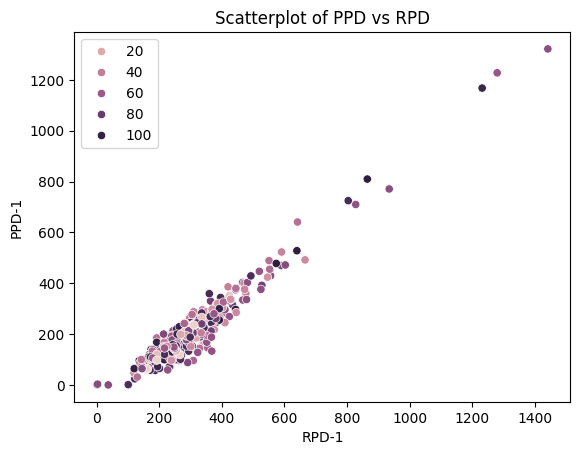

In [11]:
for i in range(1,13):
    ax = sns.scatterplot(x='RPD-'+str(i),y='PPD-'+str(i),hue='user',data=trainDF2)

# Small trick to avoid repeating legends: https://stackoverflow.com/a/36268401/5370202    
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:noOfUsers], labels[:trainDF2.user.nunique()])
ax.set_title('Scatterplot of PPD vs RPD')

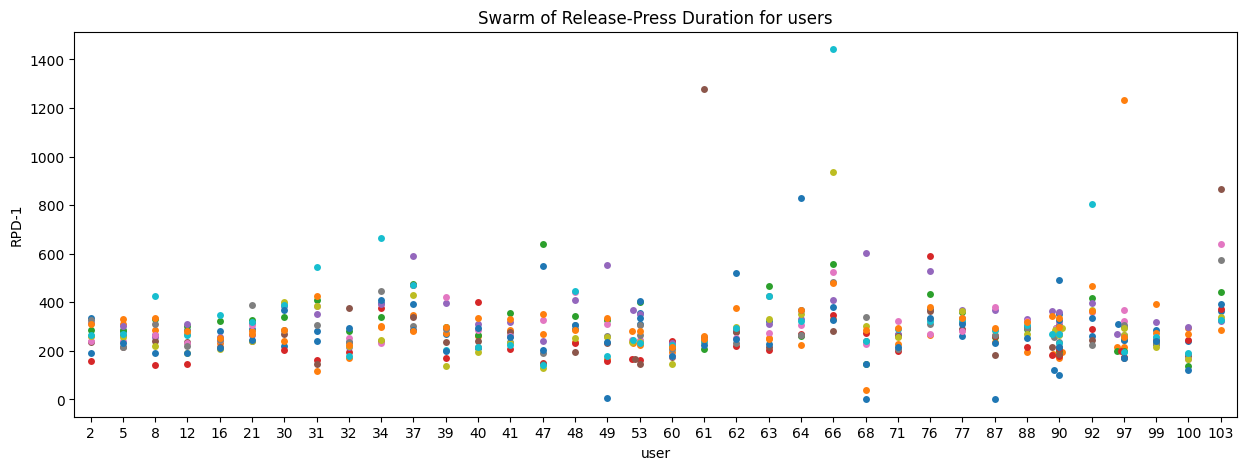

In [12]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='RPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Release-Press Duration for users')

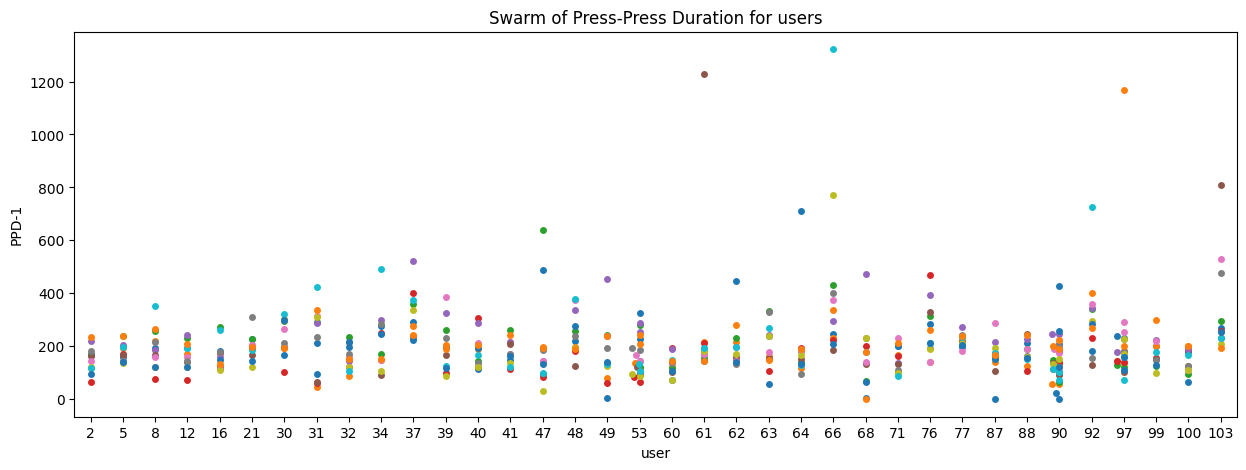

In [13]:
plt.figure(figsize=(15,5))
for i in range(1,13):
    sns.swarmplot(y='PPD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Press-Press Duration for users')

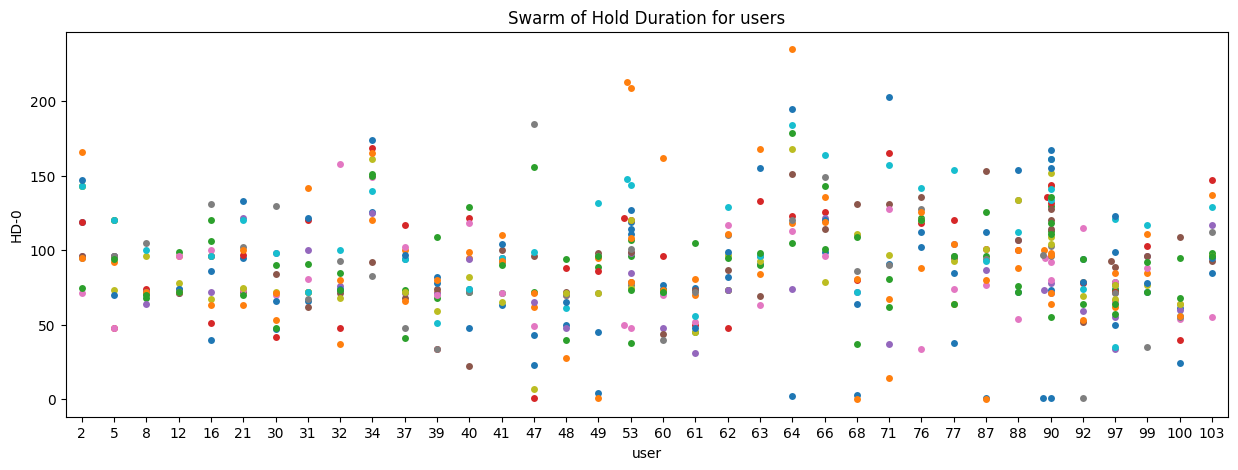

In [14]:
plt.figure(figsize=(15,5))
for i in range(13):
    sns.swarmplot(y='HD-'+str(i),x='user',data=trainDF2).set_title('Swarm of Hold Duration for users')

In [15]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF2.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
trainDF_HD_analysis

user  press-  HD-
id  key_no                   
7   0          2       0  119
    1          2     169  166
    2          2     288  143
    3          2     456  119
    4          2     520   96
...          ...     ...  ...
809 8        103    3100   96
    9        103    3310  129
    10       103    3542   95
    11       103    3797  137
    12       103    3989   96

[520 rows x 3 columns]

<Axes: xlabel='press-', ylabel='HD-'>

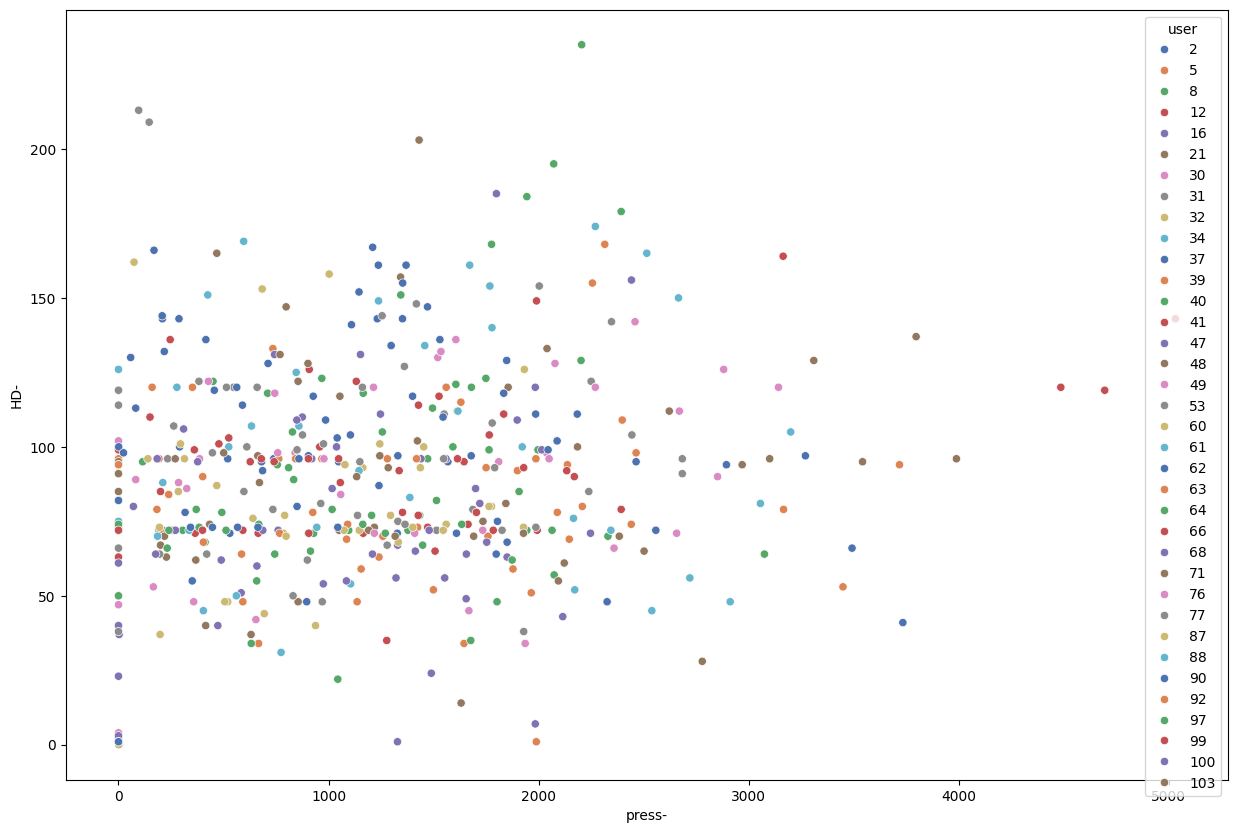

In [16]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='HD-',hue='user',data=trainDF_HD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

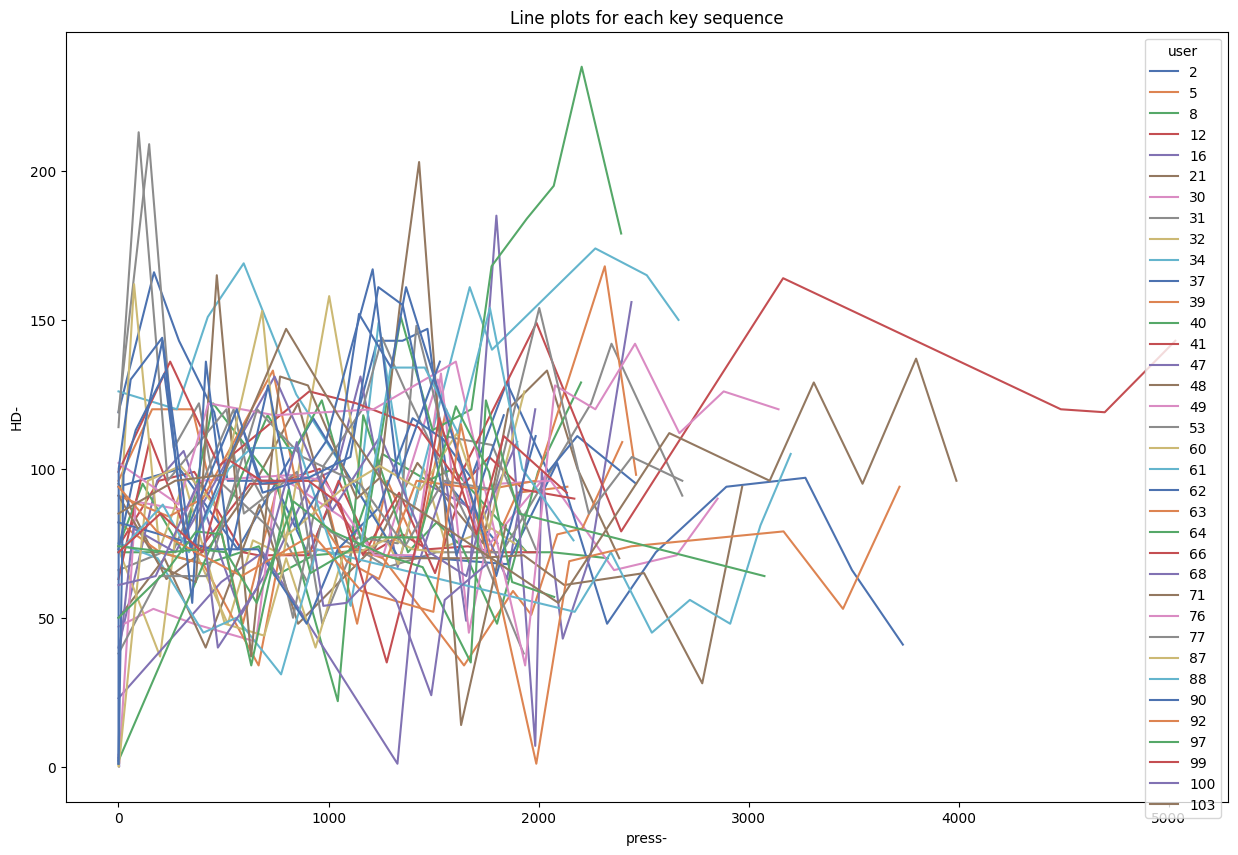

In [17]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='HD-',hue='user',units='id',estimator=None,data=trainDF_HD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [18]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = trainDF2.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_PPD_analysis

<Axes: xlabel='press-', ylabel='PPD-'>

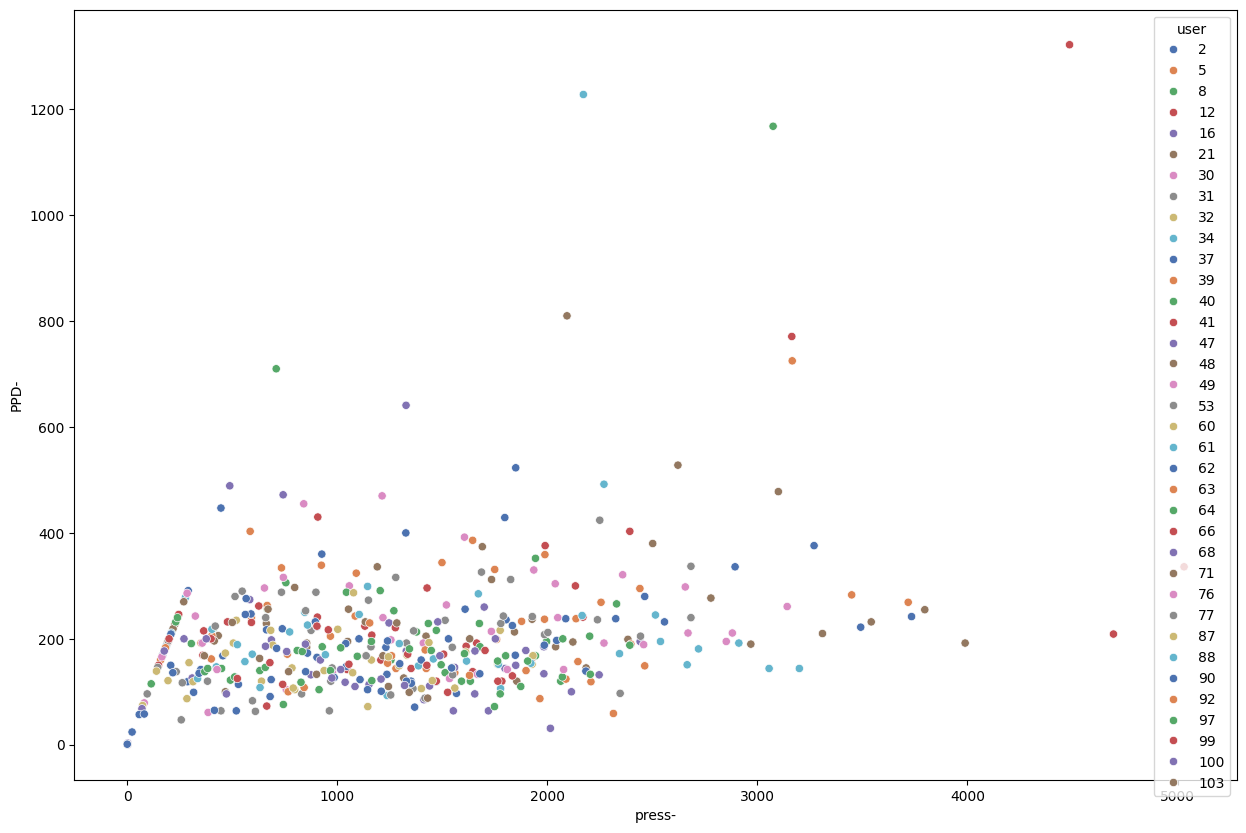

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='PPD-',hue='user',data=trainDF_PPD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

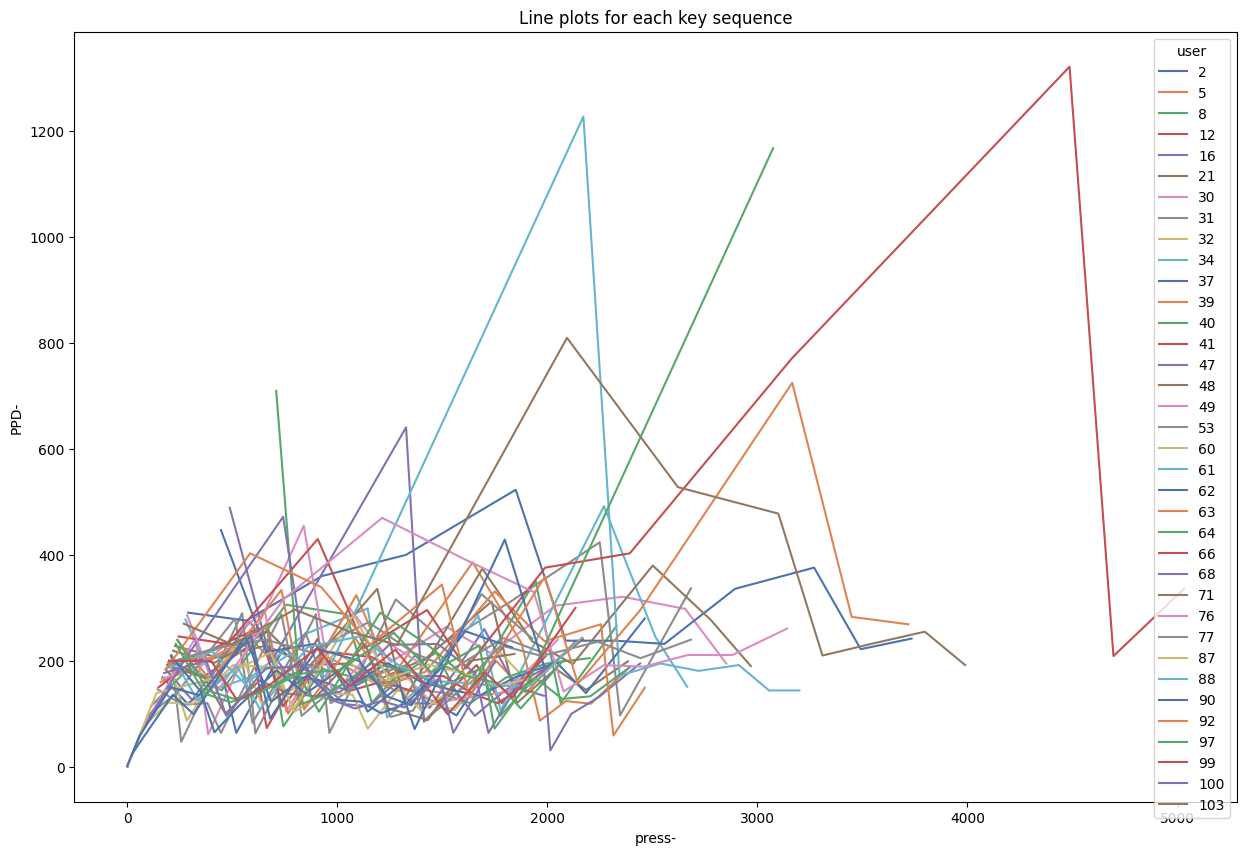

In [20]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='PPD-',hue='user',units='id',estimator=None,data=trainDF_PPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [21]:
# value_vars_cols = ['HD-'+str(i) for i in range(13)]

drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD_analysis = trainDF2.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])
# trainDF_RPD_analysis

<Axes: xlabel='press-', ylabel='RPD-'>

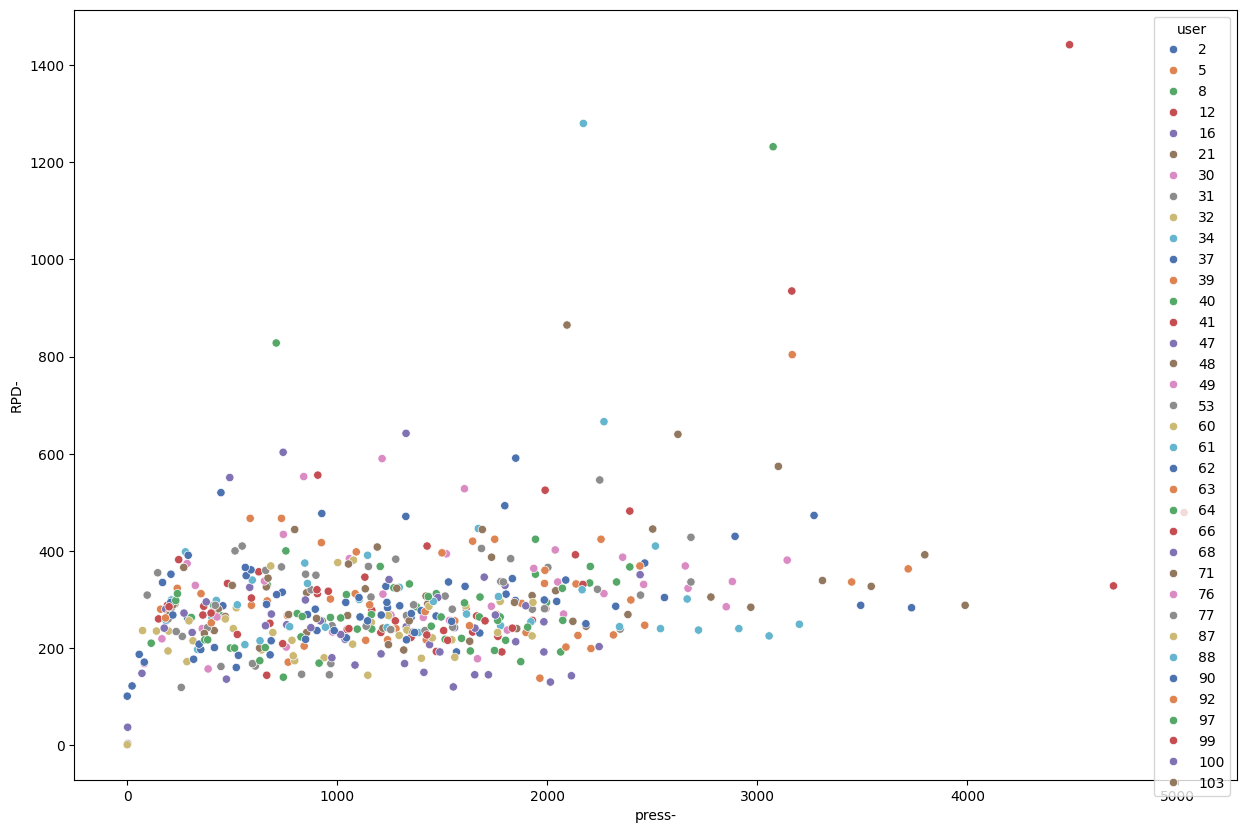

In [22]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='press-',y='RPD-',hue='user',data=trainDF_RPD_analysis,palette='deep')

Text(0.5, 1.0, 'Line plots for each key sequence')

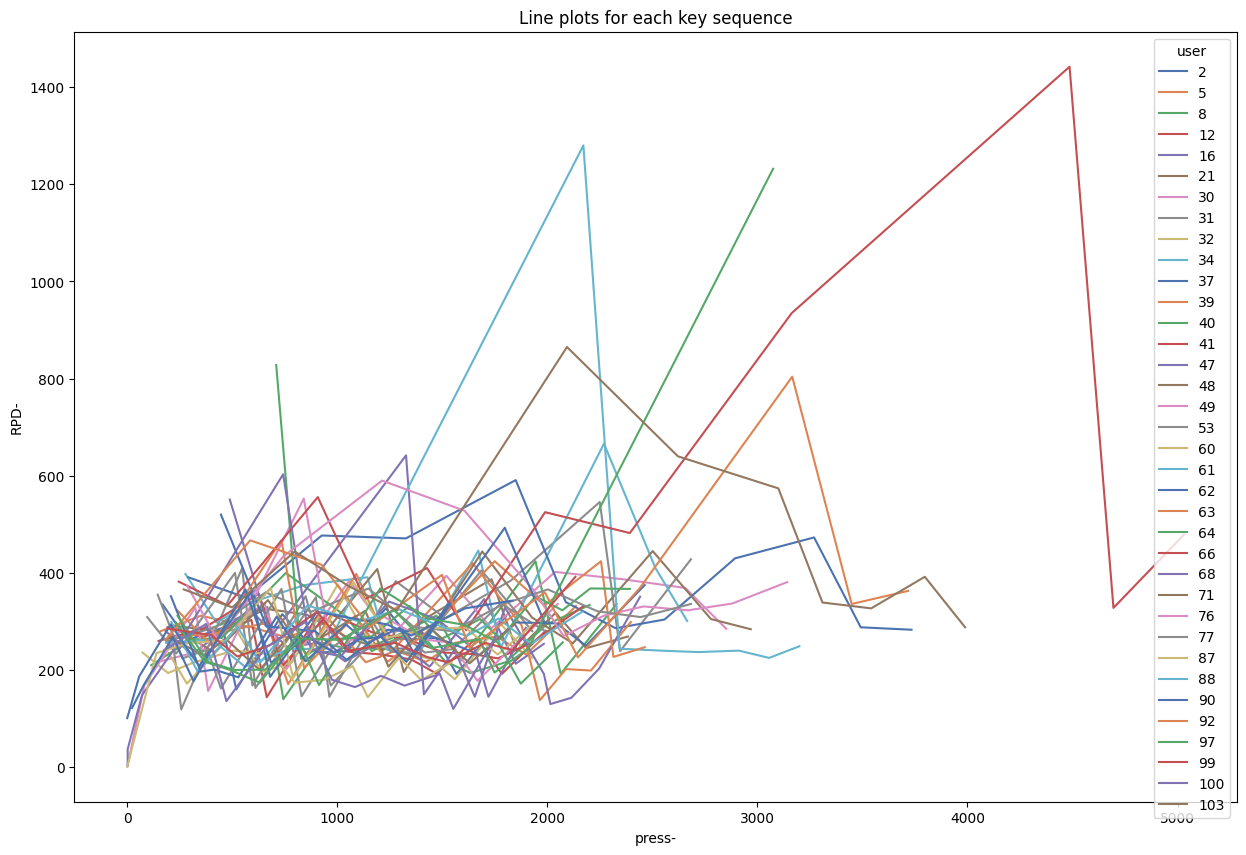

In [23]:
plt.figure(figsize=(15,10))
# sns.load_dataset(trainDF_HD_analysis)
sns.lineplot(x='press-',y='RPD-',hue='user',units='id',estimator=None,data=trainDF_RPD_analysis.reset_index(),palette='deep').set_title('Line plots for each key sequence')

In [24]:
## Training Data
drop_cols_HD_analysis = ['PPD-'+str(i) for i in range(1,13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)]

trainDF_HD_analysis = trainDF1.drop(columns=drop_cols_HD_analysis)
trainDF_HD_analysis['id'] = trainDF_HD_analysis.index
trainDF_HD_analysis = pd.wide_to_long(trainDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

drop_cols_PPD_analysis = ['HD-'+str(i) for i in range(13)] + ['RPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_PPD_analysis = trainDF1.drop(columns=drop_cols_PPD_analysis)
trainDF_PPD_analysis['id'] = trainDF_PPD_analysis.index
trainDF_PPD_analysis = pd.wide_to_long(trainDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])

drop_cols_RPD_analysis = ['HD-'+str(i) for i in range(13)] + ['PPD-'+str(i) for i in range(1,13)] + ['release-'+str(i) for i in range(13)] + ['press-0']

trainDF_RPD_analysis = trainDF1.drop(columns=drop_cols_RPD_analysis)
trainDF_RPD_analysis['id'] = trainDF_RPD_analysis.index
trainDF_RPD_analysis = pd.wide_to_long(trainDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['user','id','key_no'])


## Test Data
testDF_HD_analysis = testDF1.drop(columns=drop_cols_HD_analysis)
testDF_HD_analysis['id'] = testDF_HD_analysis.index
testDF_HD_analysis = pd.wide_to_long(testDF_HD_analysis,['press-','HD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

testDF_PPD_analysis = testDF1.drop(columns=drop_cols_PPD_analysis)
testDF_PPD_analysis['id'] = testDF_PPD_analysis.index
testDF_PPD_analysis = pd.wide_to_long(testDF_PPD_analysis,['press-','PPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

testDF_RPD_analysis = testDF1.drop(columns=drop_cols_RPD_analysis)
testDF_RPD_analysis['id'] = testDF_RPD_analysis.index
testDF_RPD_analysis = pd.wide_to_long(testDF_RPD_analysis,['press-','RPD-'],i='id',j='key_no').sort_values(by=['id','key_no'])

In [25]:
## Join these individual tables together
testDFCombined = testDF_HD_analysis.join(testDF_RPD_analysis.drop(columns=['press-']),rsuffix='RPD_').join(testDF_PPD_analysis.drop(columns=['press-']),rsuffix='PPD_')

trainDFCombined = trainDF_HD_analysis.join(trainDF_RPD_analysis.drop(columns=['user','press-']),rsuffix='RPD_').join(trainDF_PPD_analysis.drop(columns=['user','press-']),rsuffix='PPD_')
trainDFCombined

user         press-  HD-   RPD-   PPD-
id  key_no                                        
872 0          1  1717578183527   93    NaN    NaN
    1          1  1717578183737  125  335.0  210.0
    2          1  1717578183949  136  348.0  212.0
    3          1  1717578184116  133  300.0  167.0
    4          1  1717578184462   92  438.0  346.0
...          ...            ...  ...    ...    ...
887 8        112  1717580898462  124  350.0  226.0
    9        112  1717580898835  142  515.0  373.0
    10       112  1717580899066   86  317.0  231.0
    11       112  1717580899266  116  316.0  200.0
    12       112  1717580899481  125  340.0  215.0

[9243 rows x 5 columns]

C:\Users\hp\AppData\Local\Temp\ipykernel_17028\3043367649.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainDFCombined['HD-']).set_title('Hist of Hold Duration')
C:\Users\hp\AppData\Local\Temp\ipykernel_17028\3043367649.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trainDFCombined['

Text(0.5, 1.0, 'Hist of Release-Press Duration')

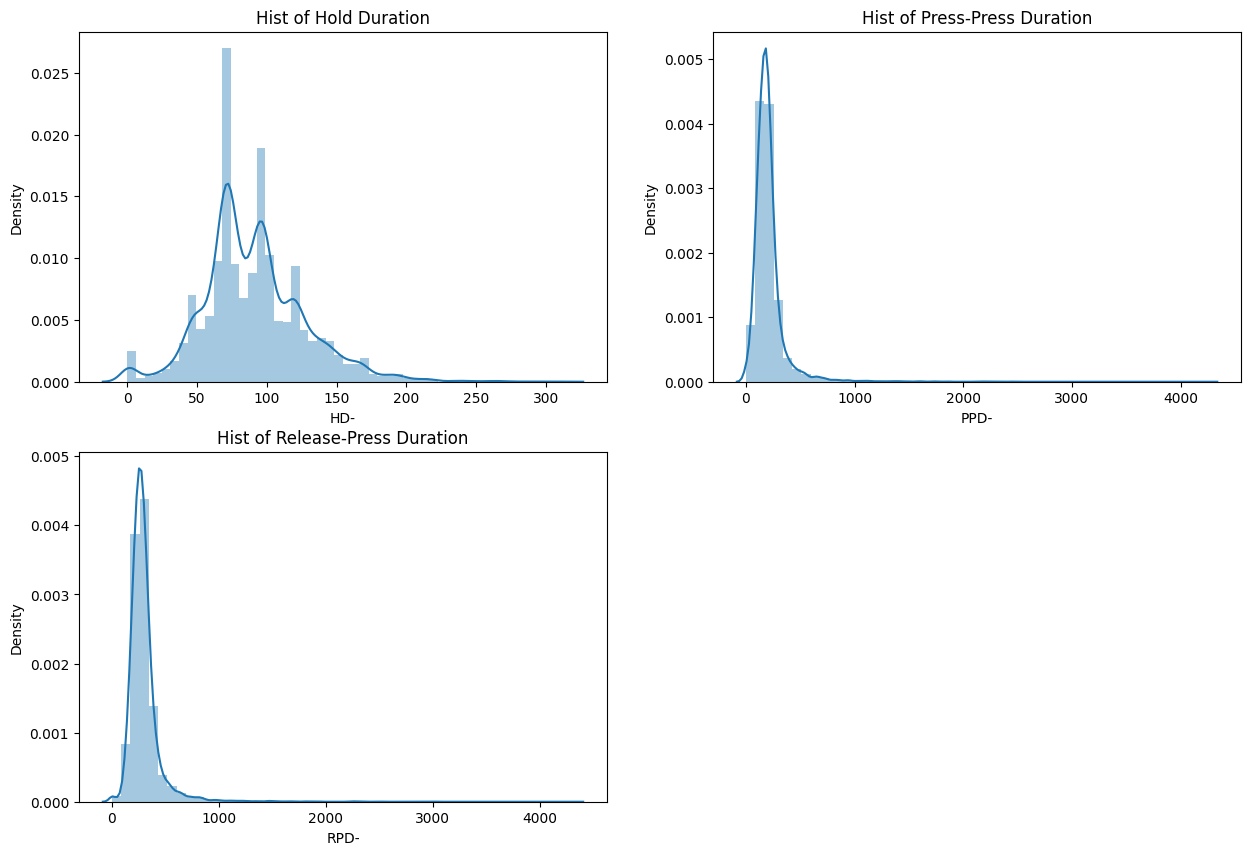

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(trainDFCombined['HD-']).set_title('Hist of Hold Duration')
plt.subplot(2,2,2)
sns.distplot(trainDFCombined['PPD-']).set_title('Hist of Press-Press Duration')
plt.subplot(2,2,3)
sns.distplot(trainDFCombined['RPD-']).set_title('Hist of Release-Press Duration')

In [27]:
noOfBins = 10

## Training Data
HDMax = trainDFCombined['HD-'].max()
RPDMax = trainDFCombined['RPD-'].max()
PPDMax = trainDFCombined['PPD-'].max()
print('Max values in train are: HDMax:',HDMax,'RPDMax:',RPDMax,'PPDMax:',PPDMax)
labels = [i for i in range(noOfBins)]

trainDFCombined['HDEnc'],HDBins = pd.qcut(trainDFCombined['HD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['PPDEnc'],RPDBins = pd.qcut(trainDFCombined['PPD-'],retbins=True,labels=labels,q=noOfBins)
trainDFCombined['RPDEnc'],PPDBins = pd.qcut(trainDFCombined['RPD-'],retbins=True,labels=labels,q=noOfBins)

trainDFCombined['HDEnc'] = trainDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(int)
trainDFCombined['PPDEnc'] = trainDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
trainDFCombined['RPDEnc'] = trainDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)


## Test Data
HDMax = testDFCombined['HD-'].max()
RPDMax = testDFCombined['RPD-'].max()
PPDMax = testDFCombined['PPD-'].max()
print('Max values in test data are: HDMax:',HDMax,'RPDMax:',RPDMax,'PPDMax:',PPDMax)
labels = [i for i in range(noOfBins)]

testDFCombined['HDEnc'] = pd.cut(testDFCombined['HD-'],labels=labels,bins=HDBins)
testDFCombined['PPDEnc'] = pd.cut(testDFCombined['PPD-'],labels=labels,bins=RPDBins)
testDFCombined['RPDEnc'] = pd.cut(testDFCombined['RPD-'],labels=labels,bins=PPDBins)

testDFCombined['HDEnc'] = testDFCombined['HDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['PPDEnc'] = testDFCombined['PPDEnc'].astype(str).replace('nan',-1).astype(float)
testDFCombined['RPDEnc'] = testDFCombined['RPDEnc'].astype(str).replace('nan',-1).astype(float)

Max values in train are: HDMax: 309 RPDMax: 4322.0 PPDMax: 4255.0
Max values in test data are: HDMax: 348 RPDMax: 1820.0 PPDMax: 1742.0


In [28]:
trainDFCombined

user         press-  HD-   RPD-   PPD-  HDEnc  PPDEnc  RPDEnc
id  key_no                                                               
872 0          1  1717578183527   93    NaN    NaN      5    -1.0    -1.0
    1          1  1717578183737  125  335.0  210.0      8     6.0     7.0
    2          1  1717578183949  136  348.0  212.0      8     6.0     7.0
    3          1  1717578184116  133  300.0  167.0      8     3.0     6.0
    4          1  1717578184462   92  438.0  346.0      5     9.0     9.0
...          ...            ...  ...    ...    ...    ...     ...     ...
887 8        112  1717580898462  124  350.0  226.0      8     7.0     8.0
    9        112  1717580898835  142  515.0  373.0      9     9.0     9.0
    10       112  1717580899066   86  317.0  231.0      4     7.0     7.0
    11       112  1717580899266  116  316.0  200.0      7     5.0     6.0
    12       112  1717580899481  125  340.0  215.0      8     6.0     7.0

[9243 rows x 8 columns]

In [29]:
testDFCombined

press-  HD-   RPD-   PPD-  HDEnc  PPDEnc  RPDEnc
id  key_no                                                         
5   0                   0   96    NaN    NaN    5.0    -1.0    -1.0
    1                 184  144  328.0  184.0    9.0     4.0     7.0
    2                 280  125  221.0   96.0    8.0     0.0     2.0
    3                 352  144  216.0   72.0    9.0     0.0     2.0
    4                 448   95  191.0   96.0    5.0     0.0     1.0
...                   ...  ...    ...    ...    ...     ...     ...
884 8       1717579328444  139  339.0  200.0    9.0     5.0     7.0
    9       1717579328587  118  261.0  143.0    7.0     2.0     4.0
    10      1717579328730  111  254.0  143.0    7.0     2.0     3.0
    11      1717579329055  135  460.0  325.0    8.0     9.0     9.0
    12      1717579329238  154  337.0  183.0    9.0     4.0     7.0

[2314 rows x 7 columns]

In [30]:
## Lower limit values of bins created
HDBins, RPDBins, PPDBins, 'No. of buckets: '+str(len(HDBins)-1)

(array([  0.,  49.,  65.,  72.,  76.,  87.,  96., 102., 119., 137., 309.]),
 array([   0.,   96.,  123.,  145.,  167.,  184.,  200.,  219.,  250.,
         313., 4255.]),
 array([   0. ,  183. ,  212.2,  235. ,  256. ,  272. ,  294. ,  316. ,
         348.8,  417. , 4322. ]),
 'No. of buckets: 10')

C:\Users\hp\AppData\Local\Temp\ipykernel_17028\475938781.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='HDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned hold duration')
C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 8.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\hp\AppData\Local\Temp\ipykernel_17028\475938781.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(y='PPDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned press-pres

Text(0.5, 1.0, 'Swarm plot of binned release-press duration')

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:3399: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


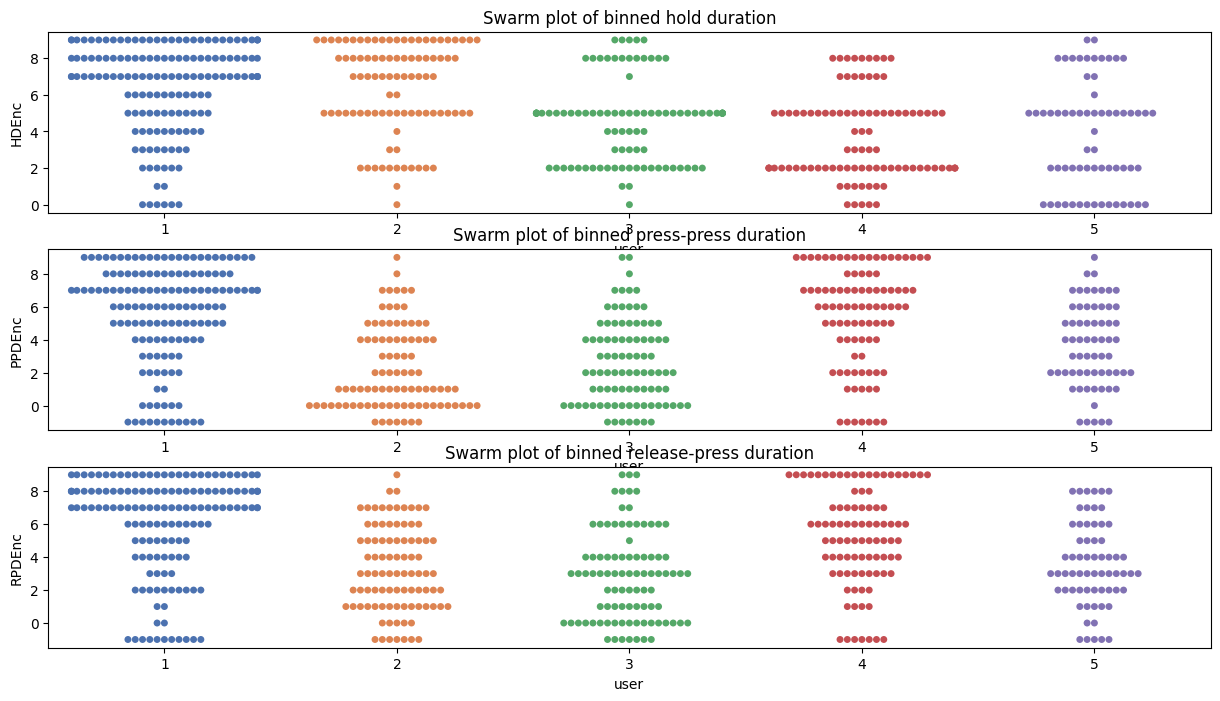

In [31]:
plt.figure(figsize=(15,8))
noOfUsers = 5
plt.subplot(3,1,1)
sns.swarmplot(y='HDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned hold duration')
plt.subplot(3,1,2)
sns.swarmplot(y='PPDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned press-press duration')
plt.subplot(3,1,3)
sns.swarmplot(y='RPDEnc',x='user',data=trainDFCombined[:8*12*noOfUsers],palette='deep').set_title('Swarm plot of binned release-press duration')

In [32]:
trainDFCombinedHDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = trainDFCombined.reset_index().groupby(['user','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('user')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('user')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('user')['RPD'].apply(np.array)

trainDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

trainDF_UserProps = pd.DataFrame(trainDF_UserProps.HD.tolist(),index = trainDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_UserProps.PPD.tolist(),index = trainDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_UserProps.RPD.tolist(),index = trainDF_UserProps.index).add_prefix('RPD_')
)

# Average bin keystrokes for each of the 110 users
trainDF_UserProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
user,,,,,,,,,,,,,,,,,,,,,
1,4.909091,7.090909,6.636364,6.181818,5.000000,8.818182,7.181818,5.272727,7.909091,5.636364,...,4.545455,6.363636,8.272727,7.090909,7.545455,6.818182,5.818182,4.636364,7.636364,6.090909
2,5.000000,8.571429,8.285714,6.857143,6.142857,4.857143,3.571429,4.000000,8.714286,7.285714,...,3.142857,0.571429,4.857143,2.428571,3.142857,6.142857,3.142857,3.142857,1.000000,6.142857
3,3.428571,3.857143,3.142857,5.428571,4.142857,7.714286,3.857143,4.714286,2.571429,3.857143,...,4.571429,0.428571,6.714286,2.285714,3.857143,3.428571,3.142857,6.285714,0.285714,4.714286
4,2.000000,2.285714,2.285714,2.714286,3.571429,3.428571,2.857143,6.714286,2.428571,7.857143,...,8.714286,3.571429,6.142857,3.857143,9.000000,5.428571,5.142857,5.142857,4.714286,6.857143
5,2.000000,5.600000,5.800000,1.800000,6.200000,4.800000,0.000000,5.200000,1.000000,6.200000,...,4.400000,4.000000,5.600000,3.600000,5.200000,1.600000,2.800000,2.800000,2.600000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,1.666667,3.833333,1.666667,7.500000,3.166667,2.333333,1.333333,3.166667,4.500000,2.500000,...,4.333333,1.500000,6.666667,6.166667,4.166667,5.166667,4.166667,5.666667,1.333333,3.833333
109,1.875000,2.250000,4.250000,5.000000,5.500000,6.250000,4.875000,7.625000,7.500000,8.500000,...,2.000000,3.875000,7.250000,4.250000,4.625000,2.125000,5.625000,2.250000,6.125000,6.500000
110,3.166667,3.333333,3.333333,6.333333,4.500000,8.666667,6.833333,5.166667,5.166667,5.666667,...,6.833333,2.000000,7.333333,2.666667,6.333333,5.000000,5.333333,4.333333,4.166667,7.833333


In [33]:
trainDFCombinedHDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['HDEnc'].mean()
trainDFCombinedPPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['PPDEnc'].mean()
trainDFCombinedRPDAvg = testDFCombined.reset_index().groupby(['id','key_no'])['RPDEnc'].mean()
tempDF = pd.DataFrame({'HD':trainDFCombinedHDAvg,'PPD':trainDFCombinedPPDAvg,'RPD':trainDFCombinedRPDAvg})

trainDF_HDProperties = tempDF.reset_index().groupby('id')['HD'].apply(np.array)
trainDF_PPDProperties = tempDF.reset_index().groupby('id')['PPD'].apply(np.array)
trainDF_RPDProperties = tempDF.reset_index().groupby('id')['RPD'].apply(np.array)

testDF_UserProps = pd.DataFrame({'HD':trainDF_HDProperties, 'PPD':trainDF_PPDProperties, 'RPD':trainDF_RPDProperties})

testDF_UserProps = pd.DataFrame(testDF_UserProps.HD.tolist(),index = testDF_UserProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_UserProps.PPD.tolist(),index = testDF_UserProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_UserProps.RPD.tolist(),index = testDF_UserProps.index).add_prefix('RPD_')
)

# Bin allocation 
testDF_UserProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
id,,,,,,,,,,,,,,,,,,,,,
5,5.0,9.0,8.0,9.0,5.0,7.0,4.0,5.0,9.0,8.0,...,2.0,1.0,6.0,3.0,2.0,6.0,4.0,5.0,2.0,5.0
10,3.0,4.0,5.0,8.0,5.0,7.0,6.0,5.0,2.0,5.0,...,2.0,1.0,8.0,6.0,4.0,3.0,3.0,5.0,0.0,6.0
23,4.0,4.0,2.0,5.0,5.0,2.0,2.0,8.0,2.0,5.0,...,8.0,4.0,5.0,4.0,9.0,6.0,9.0,5.0,9.0,9.0
25,-1.0,9.0,5.0,2.0,2.0,0.0,1.0,5.0,0.0,5.0,...,5.0,3.0,0.0,6.0,4.0,2.0,4.0,2.0,2.0,7.0
30,5.0,5.0,8.0,1.0,3.0,2.0,0.0,2.0,6.0,5.0,...,9.0,2.0,4.0,8.0,2.0,4.0,2.0,3.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,4.0,4.0,0.0,6.0,5.0,9.0,8.0,8.0,6.0,6.0,...,2.0,1.0,8.0,3.0,9.0,6.0,3.0,3.0,4.0,9.0
868,4.0,2.0,4.0,7.0,6.0,9.0,4.0,7.0,7.0,6.0,...,9.0,2.0,7.0,1.0,6.0,4.0,4.0,7.0,6.0,8.0
874,4.0,6.0,6.0,7.0,8.0,7.0,4.0,7.0,8.0,8.0,...,6.0,7.0,9.0,9.0,9.0,9.0,9.0,7.0,7.0,8.0


In [34]:
trainDF_HDTemp = trainDFCombined.reset_index().groupby(['user','id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = trainDFCombined.reset_index().groupby(['user','id'])['RPDEnc'].apply(np.array)

trainDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

trainDF_User_AllSampleProps = pd.DataFrame(trainDF_User_AllSampleProps.HD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(trainDF_User_AllSampleProps.PPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(trainDF_User_AllSampleProps.RPD.tolist(),index = trainDF_User_AllSampleProps.index).add_prefix('RPD_')
).reset_index().set_index('user').drop(columns=['id'])

trainDF_User_AllSampleProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
user,,,,,,,,,,,,,,,,,,,,,
1,5,8,8,8,5,9,9,2,9,1,...,6.0,9.0,8.0,7.0,9.0,6.0,5.0,1.0,8.0,4.0
1,3,2,8,6,3,9,9,7,8,8,...,5.0,6.0,9.0,8.0,9.0,9.0,8.0,8.0,8.0,9.0
1,3,8,9,8,5,9,9,7,7,7,...,7.0,8.0,9.0,9.0,9.0,9.0,8.0,7.0,7.0,8.0
1,7,9,9,6,4,9,9,4,8,7,...,5.0,4.0,8.0,8.0,9.0,7.0,5.0,5.0,8.0,6.0
1,7,9,8,7,7,9,6,7,9,7,...,3.0,7.0,8.0,5.0,7.0,7.0,4.0,3.0,9.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,4,5,5,9,0,9,7,2,8,5,...,9.0,1.0,6.0,3.0,5.0,3.0,6.0,0.0,3.0,8.0
110,1,5,4,5,6,9,9,6,1,7,...,8.0,2.0,8.0,4.0,5.0,5.0,3.0,5.0,4.0,8.0
111,5,4,9,9,7,9,9,7,9,5,...,7.0,7.0,9.0,7.0,8.0,8.0,3.0,1.0,0.0,8.0


In [35]:
trainDF_HDTemp = testDFCombined.reset_index().groupby(['id'])['HDEnc'].apply(np.array)
trainDF_PPDTemp = testDFCombined.reset_index().groupby(['id'])['PPDEnc'].apply(np.array)
trainDF_RPDTemp = testDFCombined.reset_index().groupby(['id'])['RPDEnc'].apply(np.array)

testDF_User_AllSampleProps = pd.DataFrame({'HD':trainDF_HDTemp, 'PPD':trainDF_PPDTemp, 'RPD':trainDF_RPDTemp})

testDF_User_AllSampleProps = pd.DataFrame(testDF_User_AllSampleProps.HD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('HD_').join(
    pd.DataFrame(testDF_User_AllSampleProps.PPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('PPD_')
).join(
    pd.DataFrame(testDF_User_AllSampleProps.RPD.tolist(),index = testDF_User_AllSampleProps.index).add_prefix('RPD_')
)

testDF_User_AllSampleProps

,HD_0,HD_1,HD_2,HD_3,HD_4,HD_5,HD_6,HD_7,HD_8,HD_9,...,RPD_3,RPD_4,RPD_5,RPD_6,RPD_7,RPD_8,RPD_9,RPD_10,RPD_11,RPD_12
id,,,,,,,,,,,,,,,,,,,,,
5,5.0,9.0,8.0,9.0,5.0,7.0,4.0,5.0,9.0,8.0,...,2.0,1.0,6.0,3.0,2.0,6.0,4.0,5.0,2.0,5.0
10,3.0,4.0,5.0,8.0,5.0,7.0,6.0,5.0,2.0,5.0,...,2.0,1.0,8.0,6.0,4.0,3.0,3.0,5.0,0.0,6.0
23,4.0,4.0,2.0,5.0,5.0,2.0,2.0,8.0,2.0,5.0,...,8.0,4.0,5.0,4.0,9.0,6.0,9.0,5.0,9.0,9.0
25,-1.0,9.0,5.0,2.0,2.0,0.0,1.0,5.0,0.0,5.0,...,5.0,3.0,0.0,6.0,4.0,2.0,4.0,2.0,2.0,7.0
30,5.0,5.0,8.0,1.0,3.0,2.0,0.0,2.0,6.0,5.0,...,9.0,2.0,4.0,8.0,2.0,4.0,2.0,3.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
867,4.0,4.0,0.0,6.0,5.0,9.0,8.0,8.0,6.0,6.0,...,2.0,1.0,8.0,3.0,9.0,6.0,3.0,3.0,4.0,9.0
868,4.0,2.0,4.0,7.0,6.0,9.0,4.0,7.0,7.0,6.0,...,9.0,2.0,7.0,1.0,6.0,4.0,4.0,7.0,6.0,8.0
874,4.0,6.0,6.0,7.0,8.0,7.0,4.0,7.0,8.0,8.0,...,6.0,7.0,9.0,9.0,9.0,9.0,9.0,7.0,7.0,8.0


In [36]:
knn_summary = KNeighborsClassifier(1)
trainX_summary = trainDF_UserProps.reset_index().drop(columns=['user'])
trainY_summary = trainDF_UserProps.index

# testX_summary = testDF_UserProps.reset_index().drop(columns=['id'])

knn_summary.fit(trainX_summary,trainY_summary)

accuracy_score(knn_summary.predict(trainX_summary),trainY_summary)

1.0

In [37]:
trainX_allSamples = trainDF_User_AllSampleProps.reset_index().drop(columns=['user'])
trainY_allSamples = trainDF_User_AllSampleProps.index

def getCrossValidationAccuracy(n_neighbours):
    knn_allSamples = KNeighborsClassifier(n_neighbours)
    sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    acc = []
    for train_index, test_index in sss.split(trainX_allSamples, trainY_allSamples):
        knn_allSamples.fit(trainX_allSamples.loc[train_index],trainY_allSamples[train_index])
        acc += [accuracy_score(knn_allSamples.predict(trainX_allSamples.loc[test_index]),trainY_allSamples[test_index])]
    return sum(acc) / len(acc)
allAttemptsAcc = [getCrossValidationAccuracy(i) for i in range(1,8)]
print('Accuracies:',allAttemptsAcc)
sns.lineplot(y=allAttemptsAcc,x=range(1,8)).set_title('Cross-Val Accuracy v/s no. of neighbours')

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

xgb1 = XGBClassifier(
    learning_rate=0.1,
    n_estimators=10,
    max_depth=5,
    min_child_weight=3,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softmax',
    num_class=len(label_encoder.classes_),  # Use the number of unique classes after encoding
    nthread=4,
    seed=27
)

param_search = {
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200, 210, 230, 250, 270, 290, 310, 330],
    'max_depth': range(4, 10, 1)
}

gsearch2b = GridSearchCV(
    estimator=xgb1,
    param_grid=param_search,
    scoring='accuracy',
    n_jobs=4,
    cv=StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0),
    verbose=1
)

gsearch2b.fit(trainX_allSamples, trainY_encoded)


Fitting 3 folds for each of 108 candidates, totalling 324 fits


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
print('Best Estimator:\n',gsearch2b.best_estimator_)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score

sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
accs = []

for train_index, test_index in sss.split(trainX_allSamples, trainY_encoded):
    gsearch2b.best_estimator_.fit(trainX_allSamples.iloc[train_index], trainY_encoded[train_index])
    predictions = gsearch2b.best_estimator_.predict(trainX_allSamples.iloc[test_index])
    acc = accuracy_score(predictions, trainY_encoded[test_index])
    print('Accuracy Score:', acc)
    accs.append(acc)

print('Average Accuracy:', sum(accs) / len(accs))


ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode class labels to start from 0
label_encoder = LabelEncoder()
trainY_encoded = label_encoder.fit_transform(trainY_allSamples)

# Fit the best estimator on the training data
gsearch2b.best_estimator_.fit(trainX_allSamples, trainY_encoded)

# Make predictions on the test data
testX_allSamples = testDF_User_AllSampleProps.reset_index().drop(columns=['id'])
textPreds_allSamples = gsearch2b.best_estimator_.predict(testX_allSamples)

# Create a DataFrame with 'idx' and 'user' columns and save it to a CSV file
submission_df = pd.DataFrame({'idx': testX_allSamples.index, 'user': textPreds_allSamples})
submission_df.to_csv('submission.csv', index=False)
